In [4]:
#Importing required python packages
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading Leads data into master data frame
df_leads=pd.read_csv("Leads.csv")
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Imputing cells with entry 'Select' by Null value since it is as good as Null (mentioned in the problem statement)

In [6]:
df_leads=df_leads.replace('Select',np.nan)
(df_leads=='Select').sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [7]:
#Inspecting master data frame dimesnions and size
print(df_leads.shape)
print(df_leads.info())

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                             

## Data Cleaning

In [8]:
#Inspecting column wise total null values
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Inspecting column wise percentage of null values
round(100*(((df_leads.isnull()).sum())/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### It is impossible to either delete or impute the rows corresponding to such large number of missing values (>30%)without losing a lot of data or introducing heavy bias.

In [10]:
#Dropping irrelevant columns from master data frame
df_leads.drop(['City','Lead Profile','Specialization','How did you hear about X Education','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags'],axis=1,inplace=True)

In [11]:
#Again inspecting column wise null value percentage after dropping irrelevant columns
round(100*((df_leads.isnull().sum())/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#Inspecting master data frame entries after dropping unimportant columns
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


#### Treating missing values in row

In [13]:
#Inspecting  number of rows with more than 5 missing values
len(df_leads[df_leads.isnull().sum(axis=1)>4].index)

9

In [14]:
#Inspecting null values percentage of rows
round(100*(len(df_leads[df_leads.isnull().sum(axis=1)>4].index)/len(df_leads.index)),2)

0.1

In [15]:
# Removing all the rows with null values greater than 5
df_leads=df_leads[df_leads.isnull().sum(axis=1)<=5]

In [16]:
#Inspecting master data frame after cleaning all null value rows.
round(100*((df_leads.isnull().sum())/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [17]:
#Checking country column stats as it contains 265 of null values
df_leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [18]:
#Removing the Country column due to redundance and large percentage of null values
df_leads.drop(['Country'],axis=1,inplace=True)

In [19]:
#Dropping two more valiables to eliminate large percentage of null values in columns
df_leads.drop(['What matters most to you in choosing a course','What is your current occupation'],axis=1,inplace=True)

In [20]:
#Inspecting final master data frame after removal of columns with large %age of null values
round(100*((df_leads.isnull().sum())/len(df_leads.index)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [21]:
#Inspecting 'Total Visits' stats as it contains 1.48% of null values
print(df_leads['TotalVisits'].describe())
df_leads['TotalVisits'].isnull().sum()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


137

In [22]:
#Removing Nans in 'TotalVisits' columns
df_leads=df_leads[~np.isnan(df_leads['TotalVisits'])]

In [23]:
# Removing Nulls in 'Lead Source' as it contains 0.39% of null values
df_leads=df_leads[~df_leads['Lead Source'].isnull()]

In [24]:
#Inspecting final master data frame after removing null values
round(100*((df_leads.isnull().sum())/len(df_leads.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [25]:
#Inspecting total no of available rows without any null values.
df_leads.shape

(9074, 24)

#### We are left with over 9000 rows and 24 columns and no null values

In [26]:
# Inspecting the cleaned master dataframe
print(df_leads.info())
print(df_leads.describe())

#From below result we can see that we have 5 measurable features and rest all are categorical variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 

## Data Preparation

In [27]:
#Mapping all categorical features with [Yes/No] to corresponding numerical output (Yes:1 and No:0)
df_leads['Do Not Email']=df_leads['Do Not Email'].map({'Yes' : 1, "No" : 0})

In [28]:
df_leads['Do Not Call']=df_leads['Do Not Call'].map({'Yes' : 1, "No" : 0})

In [29]:
df_leads['Search']=df_leads['Search'].map({'Yes' : 1, "No" : 0})
df_leads['Magazine']=df_leads['Magazine'].map({'Yes' : 1, "No" : 0})
df_leads['Newspaper Article']=df_leads['Newspaper Article'].map({'Yes' : 1, "No" : 0})
df_leads['X Education Forums']=df_leads['X Education Forums'].map({'Yes' : 1, "No" : 0})
df_leads['Newspaper']=df_leads['Newspaper'].map({'Yes' : 1, "No" : 0})
df_leads['Digital Advertisement']=df_leads['Digital Advertisement'].map({'Yes' : 1, "No" : 0})
df_leads['Through Recommendations']=df_leads['Through Recommendations'].map({'Yes' : 1, "No" : 0})
df_leads['Receive More Updates About Our Courses']=df_leads['Receive More Updates About Our Courses'].map({'Yes' : 1, "No" : 0})
df_leads['Update me on Supply Chain Content']=df_leads['Update me on Supply Chain Content'].map({'Yes' : 1, "No" : 0})
df_leads['Get updates on DM Content']=df_leads['Get updates on DM Content'].map({'Yes' : 1, "No" : 0})
df_leads['I agree to pay the amount through cheque']=df_leads['I agree to pay the amount through cheque'].map({'Yes' : 1, "No" : 0})
df_leads['A free copy of Mastering The Interview']=df_leads['A free copy of Mastering The Interview'].map({'Yes' : 1, "No" : 0})

In [30]:
# Creating Dummy Variables for categorical variables with more than two levels
# Lead Origin
LO=pd.get_dummies(df_leads['Lead Origin'],prefix='Lead Origin',drop_first=True)
df_leads=pd.concat([df_leads,LO],axis=1)
# Lead Source
LS=pd.get_dummies(df_leads['Lead Source'],prefix='Lead Source',drop_first=True)
df_leads=pd.concat([df_leads,LS],axis=1)
# Last Notable Activity
LNA=pd.get_dummies(df_leads['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
df_leads=pd.concat([df_leads,LNA],axis=1)
# Last Activity
LA=pd.get_dummies(df_leads['Last Activity'],prefix='Last Activity',drop_first=True)
df_leads=pd.concat([df_leads,LA],axis=1)

In [31]:
# Dropping the repeated columns for which we created dummy variables above.
df_leads=df_leads.drop(['Lead Origin','Lead Source','Last Notable Activity','Last Activity'],1)

In [32]:
#Final master data frame has all numerical columns including measures and categorical variables
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 74 columns):
Prospect ID                                           9074 non-null object
Lead Number                                           9074 non-null int64
Do Not Email                                          9074 non-null int64
Do Not Call                                           9074 non-null int64
Converted                                             9074 non-null int64
TotalVisits                                           9074 non-null float64
Total Time Spent on Website                           9074 non-null int64
Page Views Per Visit                                  9074 non-null float64
Search                                                9074 non-null int64
Magazine                                              9074 non-null int64
Newspaper Article                                     9074 non-null int64
X Education Forums                                    9074 non-null int64


#### All variables are numeric

In [33]:
#Inspecting data variance of numerical columns 
df_num=df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
df_num.describe(percentiles=[.25,.5,.75,.90,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x18f89cee320>,
 'caps': [<matplotlib.lines.Line2D at 0x18f89ceebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f89cee1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18f89cf8470>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f89cf8898>],
 'means': []}

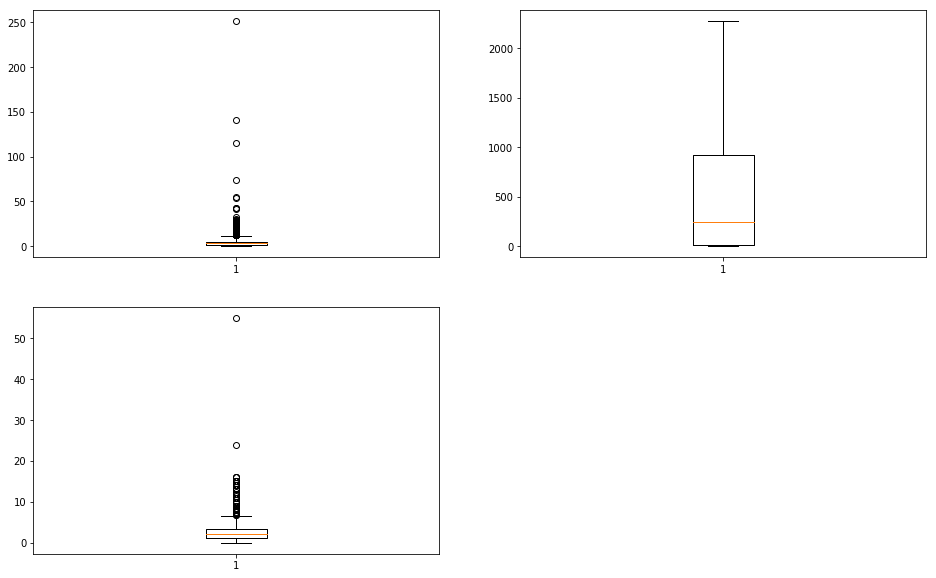

In [34]:
#Plotting all three above numerical columns to look for any outliers
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.boxplot(df_leads['TotalVisits'])
plt.subplot(2,2,2)
plt.boxplot(df_leads['Total Time Spent on Website'])
plt.subplot(2,2,3)
plt.boxplot(df_leads['Page Views Per Visit'])

### Outliers exist but can be dealt with after creating Principal Components

## Standardise the data

In [35]:
#Importing sklearn package for reducing all numerical variables to same scale.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [36]:
#Inspecting variance of numerical features after standardization
df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9.074000e+03,9.074000e+03,9.074000e+03
mean,-5.285366e-16,-2.310497e-16,4.933237e-16
std,1.000055e+00,1.000055e+00,1.000055e+00
min,-7.113315e-01,-8.856640e-01,-1.096911e+00
25%,-5.055081e-01,-8.654889e-01,-6.341086e-01
50%,-9.386128e-02,-4.344754e-01,-1.713066e-01
75%,3.177855e-01,8.067519e-01,3.840558e-01
max,5.095034e+01,3.281411e+00,2.435720e+01


{'whiskers': [<matplotlib.lines.Line2D at 0x18f89598a58>,
 'caps': [<matplotlib.lines.Line2D at 0x18f895a1358>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f89598908>],
 'medians': [<matplotlib.lines.Line2D at 0x18f895a1ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f895a1fd0>],
 'means': []}

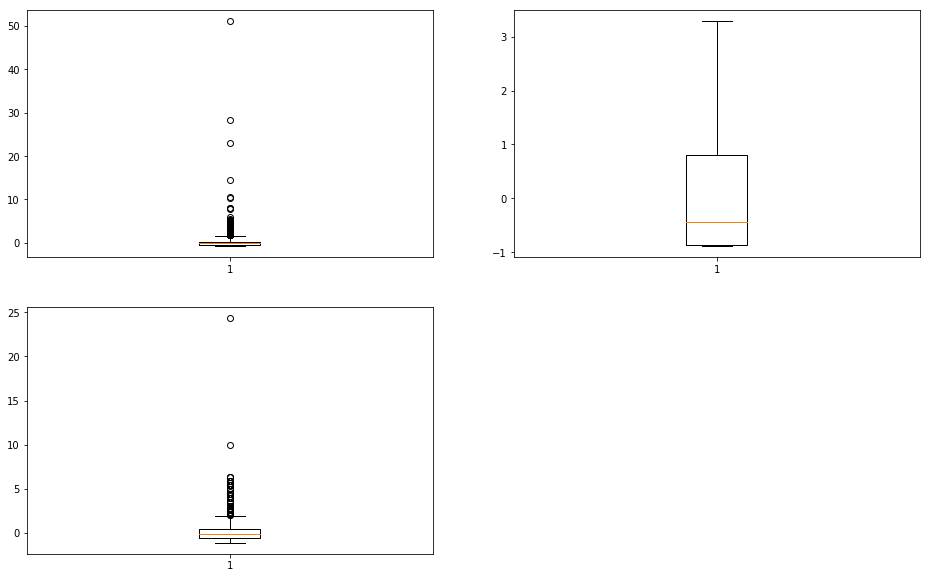

In [37]:
#Checking for outliers after standardization
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.boxplot(df_leads['TotalVisits'])
plt.subplot(2,2,2)
plt.boxplot(df_leads['Total Time Spent on Website'])
plt.subplot(2,2,3)
plt.boxplot(df_leads['Page Views Per Visit'])

In [38]:
# Checking the churn rate to check the overall balance in master leads data
churn = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
churn

37.85541106458012

#### We have almost 38% churn rate

In [39]:
#Dropping unique index columns before performing PCA as it can be done only on numerical data
df_Id=df_leads[['Prospect ID','Lead Number']]

In [40]:
#Dropping 'Prospect ID','Lead Number' as they are just identification number.
df_leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

<b> PCA

In [41]:
#Splitting master data into test and train for model building and evaluation
from sklearn.cross_validation import train_test_split

y=df_leads['Converted']
X=df_leads.drop(['Converted'],axis=1)

# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

C:\Users\Shivali_Dalmia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
#Checking train set size
X_train.shape

(6351, 71)

In [43]:
#Importing the PCA module to identify principal components using train data
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [44]:
#Checking variance of all principal components identified
pca.explained_variance_ratio_

array([3.22182140e-01, 1.47015992e-01, 1.00571904e-01, 9.14719495e-02,
       7.33311799e-02, 6.61169848e-02, 3.81961778e-02, 2.43221056e-02,
       1.92647931e-02, 1.87858442e-02, 1.53252605e-02, 1.28370419e-02,
       1.17319935e-02, 1.05855362e-02, 9.19834597e-03, 6.72181144e-03,
       5.13848079e-03, 3.62389049e-03, 3.42007863e-03, 3.19352753e-03,
       2.78780122e-03, 2.52627864e-03, 2.33076217e-03, 1.94188845e-03,
       1.57077970e-03, 1.21311665e-03, 1.03751862e-03, 8.12077188e-04,
       7.20570087e-04, 3.52871622e-04, 2.58157945e-04, 1.84848831e-04,
       1.64129161e-04, 1.28131854e-04, 1.15049049e-04, 1.02040292e-04,
       9.29535334e-05, 8.21914269e-05, 6.96670406e-05, 5.38074126e-05,
       5.37362473e-05, 4.38271281e-05, 3.19640407e-05, 2.69874226e-05,
       2.69843204e-05, 2.69818348e-05, 2.69654328e-05, 2.69069927e-05,
       2.68649747e-05, 2.67332619e-05, 2.61754282e-05, 2.36556629e-05,
       1.79408419e-05, 1.46232277e-05, 1.35829536e-05, 5.34583434e-06,
      

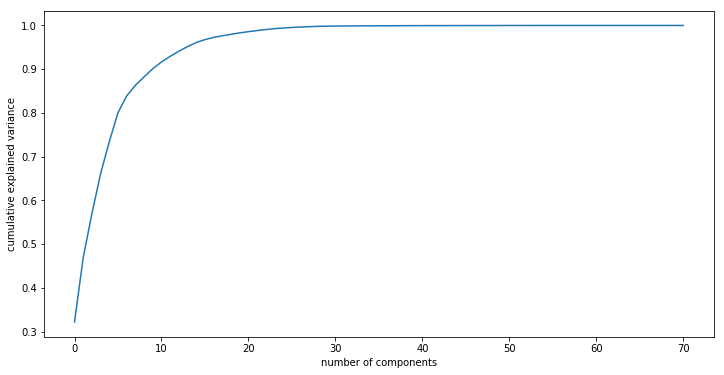

In [45]:
#Making the screeplot - plotting the cumulative variance against the number of components to identify optimum number of principal components
%matplotlib inline
fig = plt.figure(figsize = (12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<b> We see that first 15 principal components explains more than 90% variance. 

In [46]:
#Doing PCA with 15 components as they show approx 95% of variance in train data set
pca_final = PCA(svd_solver='randomized', random_state=42,n_components=15)
pca_final.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [47]:
#Fitting train data set of principal components
train_pca = pca_final.fit_transform(X_train)
train_pca.shape

(6351, 15)

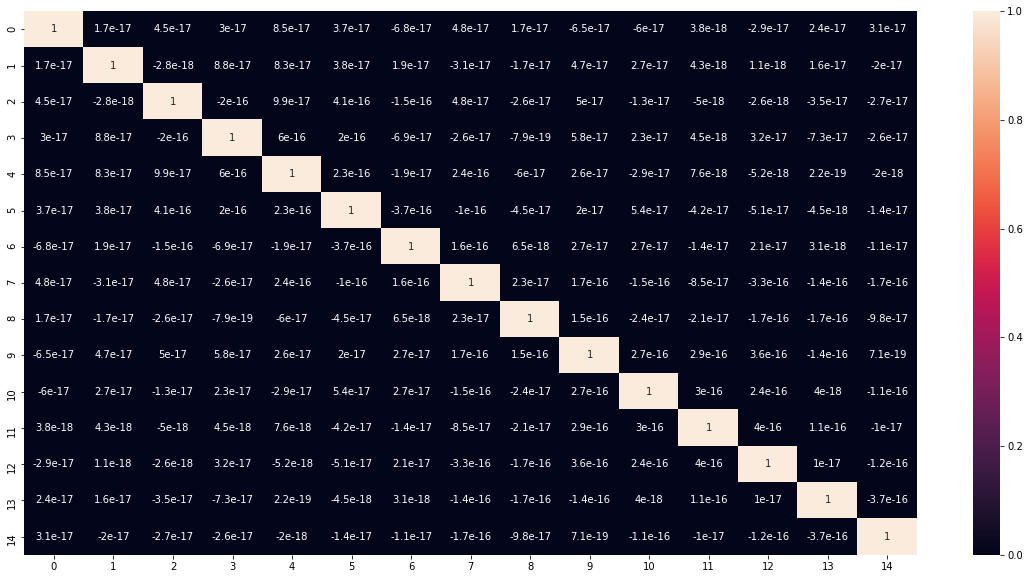

In [48]:
#Creating correlation matrix for the principal components to see correaltion between all of them
corrmat = np.corrcoef(train_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

<b> We see that there are no correlations among variables.

In [49]:
#Converting trained pca data into data frame and inspecting size of train pca data frame
df_train_pca=pd.DataFrame(train_pca)
print(df_train_pca.shape)
df_train_pca.head()

(6351, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.645776,0.022409,0.949792,-0.081608,0.152353,1.154579,-0.042175,0.910300,0.453423,-0.062601,-0.268045,0.258636,-0.131938,-0.286425,0.070018
1,-1.724502,0.076014,0.926204,0.007359,0.122161,0.944495,0.278058,-0.426134,-0.106406,0.098267,0.175550,-0.286589,0.195407,-0.043187,0.057129
2,-1.645776,0.022409,0.949792,-0.081608,0.152353,1.154579,-0.042175,0.910300,0.453423,-0.062601,-0.268045,0.258636,-0.131938,-0.286425,0.070018
3,-0.160157,-0.093410,0.457809,-0.816776,0.933193,-0.503926,-0.289175,0.097042,0.063503,0.483493,-0.062848,-0.115441,0.170962,-0.057421,-0.086228
4,-0.558958,0.919515,0.447097,0.743165,0.030131,-0.002595,0.375704,-0.395834,0.020446,-1.114015,-0.278130,-0.751025,0.383025,-0.328320,-0.110786


In [50]:
#Predicting the output of lead score on train data set.(Converted)
columnList=df_train_pca.columns
y_train=y_train.reset_index()
df_train_pca['output']=y_train['Converted']

In [51]:
# Removing outliers from final pca data frame
# Taking 2.5IQR since 1.5 leads to huge loss in data
for col in columnList:
    Q1 = df_train_pca[col].quantile(0.25)
    Q3 = df_train_pca[col].quantile(0.75)
    IQR = Q3 - Q1
    df_train_pca=df_train_pca[(df_train_pca[col] >= Q1 - 2.5*IQR) & (df_train_pca[col] <= Q3 + 2.5*IQR)]

In [52]:
#Inpsecting final pca data set for total no of rows available.
y_train=df_train_pca['output']
df_train_pca.drop(['output'],axis=1,inplace=True)
print(df_train_pca.shape)

(5465, 15)


In [53]:
#Applying selected components to the test data - 15 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2723, 15)

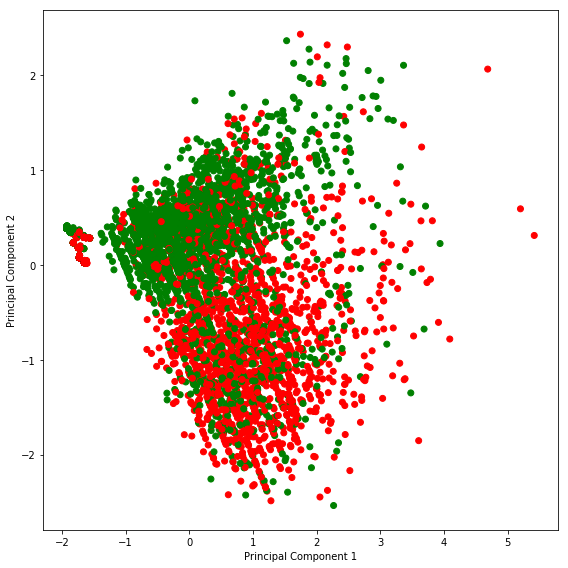

In [54]:
#Plotting two principal commponents to check the variance of data
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:][0], df_train_pca[:][1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

#From below plot we can see that data points are quite clearly segggregated.

#### Checking 3d plot for better separation

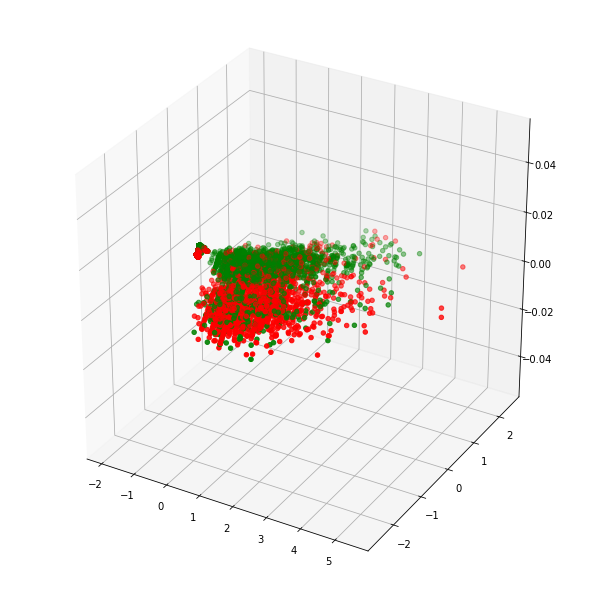

In [55]:
#Inspecting 3d view of principal components plot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter( df_train_pca.iloc[:,0], df_train_pca.iloc[:,1], c=y_train.map({0:'green',1:'red'}))
plt.show()

 ### Continue with model building

In [56]:
#Applying Logistic Regression
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [57]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

#With 15 selected principal components and logistic regression model we have achieved 85% of accuracy 

'0.85'

### Predictions and Evaluation

In [58]:
# Predicted probabilities of conversion on test data set
y_pred=model_pca.predict_proba(df_test_pca)
# Converting it into dataframe
y_pred_df=pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1=y_pred_df.iloc[:,[1]]

In [59]:
y_pred_1.head()

,1
0,0.359401
1,0.307938
2,0.022670
3,0.945689
4,0.897180


In [60]:
# Converting y_y_test_df = pd.DataFrame(y_test)
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3374,0
4262,0
7855,0
3017,1
560,1


In [61]:
# Putting CustID to index to final output variable data set
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Conv_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Conv_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Conv_Prob
0,3374,0,0.359401
1,4262,0,0.307938
2,7855,0,0.022670
3,3017,1,0.945689
4,560,1,0.897180


In [62]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

#We have chosen probability cutoff as 0.5 i.e if probability >0.5 then potential lead is likely to convert positively else negative

,CustID,Converted,Conv_Prob,predicted
0,3374,0,0.359401,0
1,4262,0,0.307938,0
2,7855,0,0.022670,0
3,3017,1,0.945689,1
4,560,1,0.897180,1


In [63]:
#Importing metrics module to calculate accuracy of the final predicted values
from sklearn import metrics

In [64]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

#We have achieved 80% of accuracy using selected model.

0.792508262945281

Our accuracy of model is 80%

In [65]:
#Plotting ROC curve
def draw_roc_curve( y_test, pred_proba_test ):        
    fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, pred_proba_test)
    #fpr_tr, tpr_tr, thresholds = metrics.roc_curve(y_tr, pred_proba_tr[:,1])
    auc_test=metrics.roc_auc_score(y_test,pred_proba_test)
    #auc_tr=roc_auc_score(y_tr,pred_proba_tr[:,1])
    #plt.plot(fpr_tr, tpr_tr, 'b-', label='Train_ROC= %.2f'  %(auc_tr))
    plt.plot(fpr_test, tpr_test, 'r-', label='Test_ROC= %.2f'  %(auc_test))
    plt.plot(fpr_test, fpr_test, 'g-', label='x=y')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.grid(True)
    plt.title('Receiver operating characteristic example')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()
    return auc_test

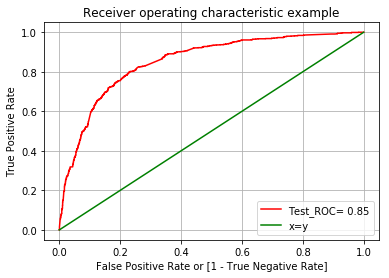

0.8514544126493083


In [66]:
auc_test=draw_roc_curve( y_pred_final.Converted, y_pred_final.Conv_Prob )
print(auc_test)

### Calculating the precision(Lead Score)

In [67]:
#Plotting consfusion matirx to check total positive prediction rate
def plotconfusionmatrix(y_test,pred_test):
    df=metrics.confusion_matrix(y_test, pred_test);
    labels = ['Negative', 'Positive']
    ax= plt.subplot()
    sns.heatmap(df, annot=True, ax = ax,fmt='g');
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    ax.set_title('Confusion Matrix'); 
    plt.show();
    return df

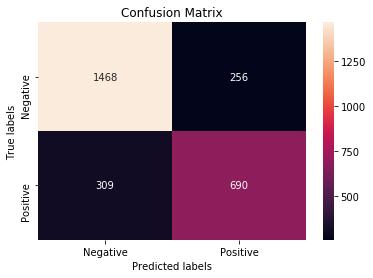

In [68]:
# Confusion matrix 
confusion=plotconfusionmatrix( y_pred_final.Converted, y_pred_final.predicted )

In [69]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
Precision=TP/(TP+FP)
Precision

0.7293868921775899

<b> Providing score between 0 and 100 to each customer

We can use probability score of Logisitc regression to provide Lead score to each customer 

In [71]:
df_pca = pca_final.fit_transform(X)

# Predicted probabilities
y_pred=model_pca.predict_proba(df_pca)
# Converting it into dataframe
y_pred_df=pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1=y_pred_df.iloc[:,[1]]

In [72]:
y_df = pd.DataFrame(y)
y_df.head()
# Putting CustID to index
y_df['CustID'] = y_df.index

In [73]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)
# Appending y_df and y_pred_1
y_pred_final = pd.concat([y_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Conv_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Conv_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Conv_Prob
0,0,0,0.273817
1,1,0,0.122874
2,2,1,0.630759
3,3,0,0.093074
4,4,1,0.354096


In [74]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Converted,Conv_Prob,predicted
0,0,0,0.273817,0
1,1,0,0.122874,0
2,2,1,0.630759,1
3,3,0,0.093074,0
4,4,1,0.354096,0


In [75]:
#Inspecting final data set of predicted lead score
y_pred_final.shape

(9074, 4)

In [76]:
#Setting unique index
df_Id=df_Id.reset_index()

In [77]:
#Converting lead score into percentage
df_Id['Lead Score']=round(y_pred_final['Conv_Prob']*100)
df_Id['Converted']=y_pred_final['Converted']

In [78]:
#Final data frame which has lead score associated with each lead number and Converted output variable which shows whether 
#they will be converting positively or not.
df_Id

,index,Prospect ID,Lead Number,Lead Score,Converted
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,27.0,0
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728,12.0,0
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,63.0,1
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,9.0,0
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681,35.0,1
5,5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,19.0,0
6,6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,50.0,1
7,7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,19.0,0
8,8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,11.0,0
9,9,af465dfc-7204-4130-9e05-33231863c4b5,660616,13.0,0
